In [2]:
from keras.datasets import imdb

(train_data_orig, train_labels_orig), (test_data_orig, test_labels_orig) \
    = imdb.load_data(num_words=10000) # top n words in train set

In [ ]:
# The IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. 
# They’re split into 25,000 reviews for training and 25,000 reviews for testing, 
# each set consisting of 50% negative and 50% positive reviews.

In [3]:
train_data = train_data_orig.copy()
train_labels = train_labels_orig.copy()
test_data = test_data_orig.copy()
test_labels = test_labels_orig.copy()

In [4]:
train_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
train_labels[0]

1

In [8]:
# decode one of these reviews back to English words:
# mapping words to an integer index.
word_index = imdb.get_word_index()
# Reverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
# Note that the indices are offset by 3 because 0, 1, and 2 are 
# reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [10]:
# Preparing the data
# No Integer, convert list into tensor
# two ways
# 1) Pad your lists so that they all have the same length, 
# turn them into an integer tensor of shape (samples, word_indices),
# 2) One-hot encode your lists to turn them into vectors of 0s and 1s. 
# This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector 
# that would be all 0s except for indices 3 and 5, which would be 1s.
#  Then you could use as the first layer in your network a 
# Dense layer, capable of handling floating-point vector data.

def vectorize_sequences(sequences, dimension=10000):
    # all zero of shape
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of i to 1
        results[i, sequence] = 1.
    return results

# vectorized train and test
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
# categorical encoding. 
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results
# 
# one_hot_train_labels = to_one_hot(train_labels)  
# one_hot_test_labels  = to_one_hot(test_labels)
# 
# from keras.utils.np_utils import to_categorical
# 
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)
# 
# # Setting aside a validation set
# x_val = x_train[:1000]
# partial_x_train = x_train[1000:]
# 
# y_val = one_hot_train_labels[:1000]
# partial_y_train = one_hot_train_labels[1000:]

In [14]:
# # Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
# Building your network
# The input data is vectors, and the labels are scalars (1s and 0s)

In [15]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

# Model Def
# No. of hidden layers affect validation and test acc
# can be 16, 32, 64..
model = models.Sequential()
# 16 hidden units # Dense for fully connected
#  relu (non-linearity) as their activation function
# tanh was popular in early days
# output = dot(W, input) + b
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# output of sigmoid is encoded probability  
model.add(layers.Dense(1, activation='sigmoid')) 

# choose a loss function and an optimizer.
# cross entropy best for probability from Information Theory
# measures the Probability Distance b/w growth truth-prediction
# alternate loss fn = mean squared error mse 
 
# optimzer rmsprop is a good default choice

 # Training your model
# Default params 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# configure the parameters
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# Using custom losses and metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 48s - loss: 0.6962 - acc: 0.4629

 1024/15000 [=>............................] - ETA: 24s - loss: 0.6910 - acc: 0.5166

 1536/15000 [==>...........................] - ETA: 16s - loss: 0.6884 - acc: 0.5091

 2048/15000 [===>..........................] - ETA: 12s - loss: 0.6853 - acc: 0.5425

 2560/15000 [====>.........................] - ETA: 9s - loss: 0.6780 - acc: 0.5773 

 3072/15000 [=====>........................] - ETA: 7s - loss: 0.6718 - acc: 0.5986

 3584/15000 [======>.......................] - ETA: 6s - loss: 0.6656 - acc: 0.6264

 4096/15000 [=======>......................] - ETA: 5s - loss: 0.6606 - acc: 0.6257

 4608/15000 [========>.....................] - ETA: 5s - loss: 0.6534 - acc: 0.6480

 5120/15000 [=========>....................] - ETA: 4s - loss: 0.6490 - acc: 0.6553

 5632/15000 [==========>...................] - ETA: 3s - loss: 0.6428 - acc: 0.6699

 6144/15000 [===========>..................] - ETA: 3s - loss: 0.6364 - acc: 0.6787

 6656/15000 [============>.................] - ETA: 3s - loss: 0.6295 - acc: 0.6916

 7168/15000 [=============>................] - ETA: 2s - loss: 0.6232 - acc: 0.6998

 7680/15000 [==============>...............] - ETA: 2s - loss: 0.6166 - acc: 0.7087

 8192/15000 [===============>..............] - ETA: 2s - loss: 0.6105 - acc: 0.7147

 8704/15000 [================>.............] - ETA: 1s - loss: 0.6041 - acc: 0.7219

 9216/15000 [=================>............] - ETA: 1s - loss: 0.5973 - acc: 0.7282

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.5919 - acc: 0.7344

10240/15000 [===================>..........] - ETA: 1s - loss: 0.5860 - acc: 0.7399

10752/15000 [====================>.........] - ETA: 1s - loss: 0.5802 - acc: 0.7458

11264/15000 [=====================>........] - ETA: 1s - loss: 0.5747 - acc: 0.7498

11776/15000 [======================>.......] - ETA: 0s - loss: 0.5699 - acc: 0.7531

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5667 - acc: 0.7550

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5613 - acc: 0.7590

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5561 - acc: 0.7623

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5508 - acc: 0.7663

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5456 - acc: 0.7696

14848/15000 [============================>.] - ETA: 0s - loss: 0.5405 - acc: 0.7733

15000/15000 [==============================] - 4s 300us/step - loss: 0.5390 - acc: 0.7745 - val_loss: 0.4000 - val_acc: 0.8687


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3641 - acc: 0.8828

 1024/15000 [=>............................] - ETA: 1s - loss: 0.3604 - acc: 0.8936

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3578 - acc: 0.8971

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.3580 - acc: 0.8940

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.3549 - acc: 0.8938

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.3499 - acc: 0.9001

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.3487 - acc: 0.9015

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.3478 - acc: 0.9016

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.3455 - acc: 0.9013

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.3441 - acc: 0.8996

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.3438 - acc: 0.8999

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.3424 - acc: 0.8986

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3415 - acc: 0.8975

 7168/15000 [=============>................] - ETA: 0s - loss: 0.3401 - acc: 0.8972

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3398 - acc: 0.8958

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3385 - acc: 0.8969

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3372 - acc: 0.8966

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3351 - acc: 0.8968

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3330 - acc: 0.8982

10240/15000 [===================>..........] - ETA: 0s - loss: 0.3303 - acc: 0.8991

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3297 - acc: 0.8988

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3277 - acc: 0.8996

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3267 - acc: 0.8997

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3270 - acc: 0.8984

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3258 - acc: 0.8980

13312/15000 [=========================>....] - ETA: 0s - loss: 0.3244 - acc: 0.8978

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3228 - acc: 0.8984

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3222 - acc: 0.8984

14848/15000 [============================>.] - ETA: 0s - loss: 0.3212 - acc: 0.8988

15000/15000 [==============================] - 3s 167us/step - loss: 0.3210 - acc: 0.8991 - val_loss: 0.3289 - val_acc: 0.8711


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2708 - acc: 0.9199

 1024/15000 [=>............................] - ETA: 1s - loss: 0.2650 - acc: 0.9170

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2514 - acc: 0.9238

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.2455 - acc: 0.9268

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.2436 - acc: 0.9273

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.2444 - acc: 0.9268

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.2446 - acc: 0.9272

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.2408 - acc: 0.9294

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.2402 - acc: 0.9295

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.2392 - acc: 0.9307

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2408 - acc: 0.9299

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2404 - acc: 0.9281

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2387 - acc: 0.9280

 7168/15000 [=============>................] - ETA: 0s - loss: 0.2383 - acc: 0.9279

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2387 - acc: 0.9279

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2397 - acc: 0.9268

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2397 - acc: 0.9261

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2396 - acc: 0.9259

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2385 - acc: 0.9268

10240/15000 [===================>..........] - ETA: 0s - loss: 0.2367 - acc: 0.9277

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2360 - acc: 0.9272

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2366 - acc: 0.9268

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2376 - acc: 0.9257

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2381 - acc: 0.9253

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2379 - acc: 0.9250

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2377 - acc: 0.9246

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2376 - acc: 0.9239

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2370 - acc: 0.9237

14848/15000 [============================>.] - ETA: 0s - loss: 0.2364 - acc: 0.9241

15000/15000 [==============================] - 2s 161us/step - loss: 0.2358 - acc: 0.9241 - val_loss: 0.2871 - val_acc: 0.8866


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1870 - acc: 0.9512

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1829 - acc: 0.9482

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1885 - acc: 0.9447

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1895 - acc: 0.9434

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1884 - acc: 0.9430

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1846 - acc: 0.9463

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1817 - acc: 0.9478

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1837 - acc: 0.9460

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1845 - acc: 0.9451

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1871 - acc: 0.9432

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1884 - acc: 0.9430

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1897 - acc: 0.9421

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1922 - acc: 0.9404

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1914 - acc: 0.9404

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1913 - acc: 0.9401

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1906 - acc: 0.9398

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1909 - acc: 0.9391

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1923 - acc: 0.9376

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1903 - acc: 0.9385

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1891 - acc: 0.9389

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1894 - acc: 0.9389

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1887 - acc: 0.9390

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1876 - acc: 0.9395

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1867 - acc: 0.9403

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1867 - acc: 0.9402

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1864 - acc: 0.9399

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1859 - acc: 0.9397

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1851 - acc: 0.9399

14848/15000 [============================>.] - ETA: 0s - loss: 0.1853 - acc: 0.9395

15000/15000 [==============================] - 2s 160us/step - loss: 0.1853 - acc: 0.9392 - val_loss: 0.2746 - val_acc: 0.8906


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1464 - acc: 0.9570

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1466 - acc: 0.9570

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1513 - acc: 0.9531

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1548 - acc: 0.9521

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1551 - acc: 0.9523

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1519 - acc: 0.9535

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1552 - acc: 0.9531

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1580 - acc: 0.9502

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1564 - acc: 0.9523

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1566 - acc: 0.9523

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1563 - acc: 0.9535

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1553 - acc: 0.9530

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1549 - acc: 0.9522

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1553 - acc: 0.9523

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1558 - acc: 0.9514

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1556 - acc: 0.9517

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1550 - acc: 0.9515

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1529 - acc: 0.9525

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1532 - acc: 0.9521

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1536 - acc: 0.9520

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1537 - acc: 0.9519

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1540 - acc: 0.9511

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1537 - acc: 0.9508

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1543 - acc: 0.9504

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1534 - acc: 0.9508

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1530 - acc: 0.9512

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1525 - acc: 0.9515

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1535 - acc: 0.9511

14848/15000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9511

15000/15000 [==============================] - 2s 161us/step - loss: 0.1532 - acc: 0.9511 - val_loss: 0.2989 - val_acc: 0.8810


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1125 - acc: 0.9727

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1125 - acc: 0.9727

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1139 - acc: 0.9714

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1116 - acc: 0.9736

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1095 - acc: 0.9758

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1124 - acc: 0.9736

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1154 - acc: 0.9718

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1138 - acc: 0.9722

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1146 - acc: 0.9720

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1161 - acc: 0.9713

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.1177 - acc: 0.9698

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1185 - acc: 0.9692

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1195 - acc: 0.9684

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1202 - acc: 0.9678

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1204 - acc: 0.9671

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1232 - acc: 0.9655

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1249 - acc: 0.9636

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1253 - acc: 0.9632

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1251 - acc: 0.9632

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1255 - acc: 0.9626

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1259 - acc: 0.9625

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1259 - acc: 0.9623

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1254 - acc: 0.9621

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1256 - acc: 0.9617

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1243 - acc: 0.9623

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1242 - acc: 0.9626

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1238 - acc: 0.9623

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1234 - acc: 0.9623

14848/15000 [============================>.] - ETA: 0s - loss: 0.1238 - acc: 0.9617

15000/15000 [==============================] - 2s 165us/step - loss: 0.1236 - acc: 0.9617 - val_loss: 0.2875 - val_acc: 0.8869


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0755 - acc: 0.9863

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0951 - acc: 0.9805

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0948 - acc: 0.9779

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0971 - acc: 0.9771

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1007 - acc: 0.9734

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1077 - acc: 0.9681

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1082 - acc: 0.9668

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1072 - acc: 0.9675

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1068 - acc: 0.9674

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1084 - acc: 0.9672

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1069 - acc: 0.9679

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1047 - acc: 0.9689

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1030 - acc: 0.9697

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1035 - acc: 0.9689

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1027 - acc: 0.9688

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1023 - acc: 0.9690

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1021 - acc: 0.9692

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1023 - acc: 0.9691

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1019 - acc: 0.9692

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1014 - acc: 0.9695

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1019 - acc: 0.9698

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1025 - acc: 0.9693

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1022 - acc: 0.9696

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1041 - acc: 0.9685

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1063 - acc: 0.9673

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1079 - acc: 0.9664

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1080 - acc: 0.9664

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1077 - acc: 0.9663

14848/15000 [============================>.] - ETA: 0s - loss: 0.1073 - acc: 0.9664

15000/15000 [==============================] - 2s 160us/step - loss: 0.1073 - acc: 0.9663 - val_loss: 0.3034 - val_acc: 0.8839


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0701 - acc: 0.9863

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0747 - acc: 0.9834

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0767 - acc: 0.9837

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0743 - acc: 0.9834

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0753 - acc: 0.9828

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0748 - acc: 0.9824

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0783 - acc: 0.9807

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0786 - acc: 0.9802

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0799 - acc: 0.9798

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0792 - acc: 0.9805

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0799 - acc: 0.9796

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0786 - acc: 0.9800

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0784 - acc: 0.9800

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0777 - acc: 0.9802

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0777 - acc: 0.9802

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0777 - acc: 0.9807

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0789 - acc: 0.9806

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0798 - acc: 0.9797

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0803 - acc: 0.9793

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0821 - acc: 0.9785

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0834 - acc: 0.9775

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0848 - acc: 0.9763

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0860 - acc: 0.9757

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0866 - acc: 0.9754

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0866 - acc: 0.9753

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0861 - acc: 0.9754

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0854 - acc: 0.9758

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0847 - acc: 0.9762

14848/15000 [============================>.] - ETA: 0s - loss: 0.0851 - acc: 0.9757

15000/15000 [==============================] - 2s 160us/step - loss: 0.0859 - acc: 0.9752 - val_loss: 0.3201 - val_acc: 0.8810


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0610 - acc: 0.9902

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0585 - acc: 0.9912

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0633 - acc: 0.9876

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0617 - acc: 0.9873

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0593 - acc: 0.9883

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0608 - acc: 0.9873

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0620 - acc: 0.9863

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0622 - acc: 0.9858

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0613 - acc: 0.9863

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0626 - acc: 0.9857

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0630 - acc: 0.9853

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0625 - acc: 0.9852

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0619 - acc: 0.9857

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0620 - acc: 0.9858

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0618 - acc: 0.9859

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0624 - acc: 0.9857

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0626 - acc: 0.9854

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0628 - acc: 0.9850

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0648 - acc: 0.9840

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0663 - acc: 0.9831

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0671 - acc: 0.9826

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0681 - acc: 0.9824

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0683 - acc: 0.9826

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0686 - acc: 0.9823

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0685 - acc: 0.9823

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0684 - acc: 0.9825

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0688 - acc: 0.9823

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0692 - acc: 0.9821

14848/15000 [============================>.] - ETA: 0s - loss: 0.0691 - acc: 0.9821

15000/15000 [==============================] - 2s 160us/step - loss: 0.0692 - acc: 0.9821 - val_loss: 0.3415 - val_acc: 0.8802


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0606 - acc: 0.9844

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0529 - acc: 0.9893

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0552 - acc: 0.9902

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0531 - acc: 0.9907

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0546 - acc: 0.9906

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0543 - acc: 0.9899

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0526 - acc: 0.9908

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0535 - acc: 0.9907

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0536 - acc: 0.9900

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0542 - acc: 0.9896

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0543 - acc: 0.9899

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0551 - acc: 0.9889

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0564 - acc: 0.9874

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0586 - acc: 0.9860

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0587 - acc: 0.9854

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0579 - acc: 0.9860

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0576 - acc: 0.9861

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0571 - acc: 0.9861

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0569 - acc: 0.9863

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0567 - acc: 0.9867

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0569 - acc: 0.9865

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0562 - acc: 0.9867

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0562 - acc: 0.9868

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0564 - acc: 0.9866

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0564 - acc: 0.9867

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0566 - acc: 0.9866

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0567 - acc: 0.9865

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0581 - acc: 0.9858

14848/15000 [============================>.] - ETA: 0s - loss: 0.0592 - acc: 0.9850

15000/15000 [==============================] - 2s 160us/step - loss: 0.0594 - acc: 0.9849 - val_loss: 0.3742 - val_acc: 0.8784


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0399 - acc: 0.9902

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0437 - acc: 0.9912

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0421 - acc: 0.9922

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0450 - acc: 0.9902

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0440 - acc: 0.9906

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0422 - acc: 0.9919

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0412 - acc: 0.9925

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0400 - acc: 0.9927

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0402 - acc: 0.9926

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0413 - acc: 0.9920

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0420 - acc: 0.9917

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0427 - acc: 0.9912

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0423 - acc: 0.9914

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0422 - acc: 0.9914

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0421 - acc: 0.9917

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0422 - acc: 0.9916

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0429 - acc: 0.9913

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0424 - acc: 0.9913

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0426 - acc: 0.9912

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0426 - acc: 0.9912

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0429 - acc: 0.9912

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0434 - acc: 0.9909

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0441 - acc: 0.9907

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0449 - acc: 0.9904

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0454 - acc: 0.9903

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0454 - acc: 0.9905

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0451 - acc: 0.9907

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0454 - acc: 0.9906

14848/15000 [============================>.] - ETA: 0s - loss: 0.0457 - acc: 0.9904

15000/15000 [==============================] - 2s 161us/step - loss: 0.0458 - acc: 0.9902 - val_loss: 0.3940 - val_acc: 0.8729


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0279 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0299 - acc: 0.9941

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0310 - acc: 0.9941

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0319 - acc: 0.9946

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0304 - acc: 0.9953

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0307 - acc: 0.9954

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0308 - acc: 0.9953

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0307 - acc: 0.9954

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0305 - acc: 0.9954

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0322 - acc: 0.9941

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0344 - acc: 0.9936

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0356 - acc: 0.9925

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0357 - acc: 0.9926

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0367 - acc: 0.9925

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0370 - acc: 0.9924

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0372 - acc: 0.9924

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0369 - acc: 0.9926

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0371 - acc: 0.9928

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0369 - acc: 0.9929

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0368 - acc: 0.9931

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0372 - acc: 0.9927

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0366 - acc: 0.9929

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0369 - acc: 0.9929

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0369 - acc: 0.9929

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0367 - acc: 0.9929

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0367 - acc: 0.9928

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0365 - acc: 0.9929

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0370 - acc: 0.9927

14848/15000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9927

15000/15000 [==============================] - 2s 161us/step - loss: 0.0369 - acc: 0.9927 - val_loss: 0.4353 - val_acc: 0.8753


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0322 - acc: 0.9941

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0277 - acc: 0.9971

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0251 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0242 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0227 - acc: 0.9980

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0228 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0235 - acc: 0.9975

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0235 - acc: 0.9973

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0257 - acc: 0.9961

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0268 - acc: 0.9963

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0283 - acc: 0.9954

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0297 - acc: 0.9948

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0294 - acc: 0.9949

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0290 - acc: 0.9951

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0286 - acc: 0.9952

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0287 - acc: 0.9954

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0287 - acc: 0.9953

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0290 - acc: 0.9952

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0289 - acc: 0.9954

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0289 - acc: 0.9954

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0287 - acc: 0.9955

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0286 - acc: 0.9955

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0285 - acc: 0.9956

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0286 - acc: 0.9954

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0286 - acc: 0.9955

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0288 - acc: 0.9952

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0291 - acc: 0.9948

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0288 - acc: 0.9949

14848/15000 [============================>.] - ETA: 0s - loss: 0.0288 - acc: 0.9949

15000/15000 [==============================] - 2s 162us/step - loss: 0.0289 - acc: 0.9948 - val_loss: 0.4882 - val_acc: 0.8702


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0256 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0268 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0243 - acc: 0.9967

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0237 - acc: 0.9971

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0221 - acc: 0.9977

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0220 - acc: 0.9974

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0213 - acc: 0.9975

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0210 - acc: 0.9976

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0208 - acc: 0.9972

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0210 - acc: 0.9971

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0207 - acc: 0.9972

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0205 - acc: 0.9972

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0214 - acc: 0.9971

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0227 - acc: 0.9968

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0233 - acc: 0.9964

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0233 - acc: 0.9965

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0229 - acc: 0.9967

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0226 - acc: 0.9969

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0227 - acc: 0.9968

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0229 - acc: 0.9966

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0231 - acc: 0.9966

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0230 - acc: 0.9967

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0229 - acc: 0.9968

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0229 - acc: 0.9967

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0232 - acc: 0.9965

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0236 - acc: 0.9964

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0242 - acc: 0.9962

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0246 - acc: 0.9958

14848/15000 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.9955

15000/15000 [==============================] - 2s 161us/step - loss: 0.0249 - acc: 0.9955 - val_loss: 0.4876 - val_acc: 0.8731


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0176 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0138 - acc: 0.9990

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0138 - acc: 0.9993

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0141 - acc: 0.9995

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0137 - acc: 0.9992

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0134 - acc: 0.9993

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0137 - acc: 0.9989

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0134 - acc: 0.9990

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0143 - acc: 0.9987

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0143 - acc: 0.9986

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0143 - acc: 0.9988

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0143 - acc: 0.9987

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0143 - acc: 0.9985

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0143 - acc: 0.9985

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0142 - acc: 0.9984

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0143 - acc: 0.9984

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0143 - acc: 0.9985

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0145 - acc: 0.9984

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0144 - acc: 0.9984

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0144 - acc: 0.9984

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0147 - acc: 0.9981

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0153 - acc: 0.9980

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0156 - acc: 0.9979

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0161 - acc: 0.9976

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0165 - acc: 0.9975

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0166 - acc: 0.9974

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0167 - acc: 0.9974

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0168 - acc: 0.9973

14848/15000 [============================>.] - ETA: 0s - loss: 0.0170 - acc: 0.9972

15000/15000 [==============================] - 2s 162us/step - loss: 0.0170 - acc: 0.9972 - val_loss: 0.5111 - val_acc: 0.8691


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0166 - acc: 0.9941

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0128 - acc: 0.9971

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0120 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0122 - acc: 0.9985

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0124 - acc: 0.9988

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0121 - acc: 0.9990

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0123 - acc: 0.9992

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0125 - acc: 0.9990

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0123 - acc: 0.9991

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0120 - acc: 0.9992

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0118 - acc: 0.9993

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0119 - acc: 0.9992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0120 - acc: 0.9991

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0118 - acc: 0.9992

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0121 - acc: 0.9990

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0124 - acc: 0.9990

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0128 - acc: 0.9991

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0135 - acc: 0.9989

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0141 - acc: 0.9988

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0144 - acc: 0.9986

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0145 - acc: 0.9987

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0144 - acc: 0.9988

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0141 - acc: 0.9988

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0138 - acc: 0.9988

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0136 - acc: 0.9988

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0135 - acc: 0.9989

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0134 - acc: 0.9988

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0135 - acc: 0.9988

14848/15000 [============================>.] - ETA: 0s - loss: 0.0135 - acc: 0.9988

15000/15000 [==============================] - 2s 161us/step - loss: 0.0135 - acc: 0.9988 - val_loss: 0.5475 - val_acc: 0.8707


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0156 - acc: 0.9941

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0114 - acc: 0.9971

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0093 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0092 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0091 - acc: 0.9980

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0086 - acc: 0.9984

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0084 - acc: 0.9986

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0083 - acc: 0.9988

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0083 - acc: 0.9989

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0083 - acc: 0.9990

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0083 - acc: 0.9991

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0082 - acc: 0.9992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0082 - acc: 0.9992

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0080 - acc: 0.9993

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0083 - acc: 0.9993

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0088 - acc: 0.9993

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0097 - acc: 0.9987

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0115 - acc: 0.9978

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0122 - acc: 0.9977

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0123 - acc: 0.9978

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9978

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0119 - acc: 0.9979

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0117 - acc: 0.9980

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0117 - acc: 0.9980

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0116 - acc: 0.9981

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0116 - acc: 0.9980

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0115 - acc: 0.9981

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9981

14848/15000 [============================>.] - ETA: 0s - loss: 0.0114 - acc: 0.9982

15000/15000 [==============================] - 2s 159us/step - loss: 0.0113 - acc: 0.9982 - val_loss: 0.5734 - val_acc: 0.8681


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0069 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0063 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0060 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0057 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0057 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0059 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0059 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0059 - acc: 0.9999

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0059 - acc: 0.9999

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0059 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.9999

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.9998

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0064 - acc: 0.9997

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0073 - acc: 0.9996

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0084 - acc: 0.9991

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0088 - acc: 0.9991

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0087 - acc: 0.9991

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0088 - acc: 0.9991

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.9991

14848/15000 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 0.9991

15000/15000 [==============================] - 2s 161us/step - loss: 0.0086 - acc: 0.9991 - val_loss: 0.6021 - val_acc: 0.8658


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0032 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0047 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0048 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0044 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0043 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0044 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.9995

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.9996

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.9996

 5632/15000 [==========>...................]

 - ETA: 0s - loss: 0.0048 - acc: 0.9996

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0048 - acc: 0.9997

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0048 - acc: 0.9997

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0048 - acc: 0.9997

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0048 - acc: 0.9997

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0048 - acc: 0.9998

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0047 - acc: 0.9998

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0047 - acc: 0.9998

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0047 - acc: 0.9998

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0046 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0046 - acc: 0.9998

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0046 - acc: 0.9998

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0047 - acc: 0.9998

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0047 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0048 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0047 - acc: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0047 - acc: 0.9999

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0047 - acc: 0.9999

14848/15000 [============================>.] - ETA: 0s - loss: 0.0047 - acc: 0.9999

15000/15000 [==============================] - 2s 163us/step - loss: 0.0047 - acc: 0.9999 - val_loss: 0.6376 - val_acc: 0.8666


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0030 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0029 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0029 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0030 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0030 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0032 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0029 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0030 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0033 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0034 - acc: 0.9999

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0035 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0041 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.9989

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.9986

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.9987

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0077 - acc: 0.9987

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.9988

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0073 - acc: 0.9988

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.9989

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0071 - acc: 0.9989

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0069 - acc: 0.9990

14848/15000 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.9990

15000/15000 [==============================] - 3s 167us/step - loss: 0.0068 - acc: 0.9990 - val_loss: 0.6677 - val_acc: 0.8657


In [18]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline
import seaborn as sns
sns.set(context='paper',
style='darkgrid',
rc={'figure.facecolor':'white'},
font_scale=1.2)

In [19]:
# metrics being monitored during training and during validation
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

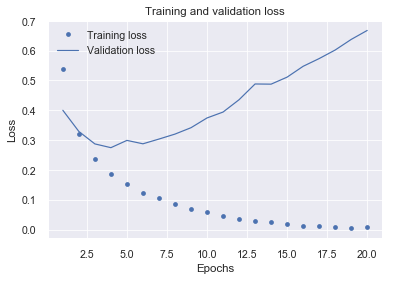

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

# bo - blue dot for training loss
# b - blue solid line for validation acc
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# training loss decreases with every epoch, and 
# the training accuracy increases with every epoch.

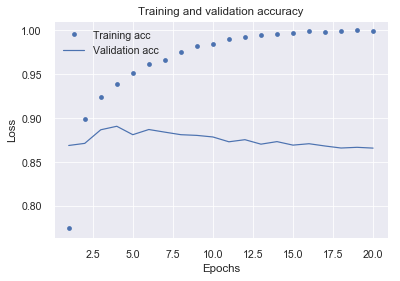

In [25]:
plt.clf()          # Clears the figure                        
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
# validation loss and accuracy: they seem to peak at the fourth epoch.
# model is overfitting. Stop after three epoch
# as NN gets better on train, they start overfittting and end up
# with worse results for out-of-sample data

In [27]:
# retrain the model on full train and predict for test
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


  512/25000 [..............................] - ETA: 15s - loss: 0.6932 - acc: 0.5117

 1024/25000 [>.............................] - ETA: 8s - loss: 0.6887 - acc: 0.5586 

 1536/25000 [>.............................] - ETA: 6s - loss: 0.6822 - acc: 0.5833

 2048/25000 [=>............................] - ETA: 5s - loss: 0.6793 - acc: 0.5796

 2560/25000 [==>...........................] - ETA: 5s - loss: 0.6727 - acc: 0.6012

 3072/25000 [==>...........................] - ETA: 4s - loss: 0.6668 - acc: 0.6224

 3584/25000 [===>..........................] - ETA: 4s - loss: 0.6613 - acc: 0.6348

 4096/25000 [===>..........................] - ETA: 3s - loss: 0.6567 - acc: 0.6433

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.6507 - acc: 0.6595

 5120/25000 [=====>........................] - ETA: 3s - loss: 0.6427 - acc: 0.6744

 5632/25000 [=====>........................] - ETA: 3s - loss: 0.6361 - acc: 0.6863

 6144/25000 [======>.......................] - ETA: 3s - loss: 0.6305 - acc: 0.6965

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.6240 - acc: 0.7070

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.6186 - acc: 0.7144

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.6130 - acc: 0.7207

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.6078 - acc: 0.7274

 8704/25000 [=========>....................] - ETA: 2s - loss: 0.6020 - acc: 0.7336

 9216/25000 [==========>...................] - ETA: 2s - loss: 0.5964 - acc: 0.7405

 9728/25000 [==========>...................] - ETA: 2s - loss: 0.5907 - acc: 0.7469

10240/25000 [===========>..................] - ETA: 2s - loss: 0.5855 - acc: 0.7517

10752/25000 [===========>..................] - ETA: 2s - loss: 0.5799 - acc: 0.7574

11264/25000 [============>.................] - ETA: 1s - loss: 0.5749 - acc: 0.7623

11776/25000 [=============>................] - ETA: 1s - loss: 0.5700 - acc: 0.7660

12288/25000 [=============>................] - ETA: 1s - loss: 0.5649 - acc: 0.7698

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5607 - acc: 0.7737

13312/25000 [==============>...............] - ETA: 1s - loss: 0.5561 - acc: 0.7758

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5522 - acc: 0.7788

14336/25000 [================>.............] - ETA: 1s - loss: 0.5472 - acc: 0.7831

14848/25000 [================>.............] - ETA: 1s - loss: 0.5425 - acc: 0.7859

15360/25000 [=================>............] - ETA: 1s - loss: 0.5379 - acc: 0.7886

15872/25000 [==================>...........] - ETA: 1s - loss: 0.5334 - acc: 0.7916

16384/25000 [==================>...........] - ETA: 1s - loss: 0.5303 - acc: 0.7932

16896/25000 [===================>..........] - ETA: 1s - loss: 0.5269 - acc: 0.7948

17408/25000 [===================>..........] - ETA: 1s - loss: 0.5228 - acc: 0.7973

17920/25000 [====================>.........] - ETA: 0s - loss: 0.5183 - acc: 0.8004

18432/25000 [=====================>........] - ETA: 0s - loss: 0.5149 - acc: 0.8024

18944/25000 [=====================>........] - ETA: 0s - loss: 0.5117 - acc: 0.8036

19456/25000 [======================>.......] - ETA: 0s - loss: 0.5080 - acc: 0.8052

19968/25000 [======================>.......] - ETA: 0s - loss: 0.5053 - acc: 0.8063

20480/25000 [=======================>......] - ETA: 0s - loss: 0.5018 - acc: 0.8085

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4995 - acc: 0.8095

21504/25000 [========================>.....] - ETA: 0s - loss: 0.4964 - acc: 0.8109

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4935 - acc: 0.8117

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4907 - acc: 0.8131

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4877 - acc: 0.8144

23552/25000 [===========================>..] - ETA: 0s - loss: 0.4844 - acc: 0.8165

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4806 - acc: 0.8188

24576/25000 [============================>.] - ETA: 0s - loss: 0.4774 - acc: 0.8206

25000/25000 [==============================] - 3s 133us/step - loss: 0.4749 - acc: 0.8217


Epoch 2/4


  512/25000 [..............................] - ETA: 2s - loss: 0.2890 - acc: 0.9277

 1024/25000 [>.............................] - ETA: 2s - loss: 0.2979 - acc: 0.9219

 1536/25000 [>.............................] - ETA: 2s - loss: 0.3000 - acc: 0.9115

 2048/25000 [=>............................] - ETA: 2s - loss: 0.3003 - acc: 0.9106

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.2972 - acc: 0.9105

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.2950 - acc: 0.9128

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.2937 - acc: 0.9129

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.2937 - acc: 0.9124

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.2923 - acc: 0.9112

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.2927 - acc: 0.9115

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.2944 - acc: 0.9103

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.2927 - acc: 0.9102

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2924 - acc: 0.9094

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.2891 - acc: 0.9107

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2882 - acc: 0.9104

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.2876 - acc: 0.9105

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2882 - acc: 0.9084

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.2861 - acc: 0.9095

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2841 - acc: 0.9105

10240/25000 [===========>..................] - ETA: 1s - loss: 0.2821 - acc: 0.9112

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2808 - acc: 0.9116

11264/25000 [============>.................] - ETA: 1s - loss: 0.2800 - acc: 0.9118

11776/25000 [=============>................] - ETA: 1s - loss: 0.2784 - acc: 0.9122

12288/25000 [=============>................] - ETA: 1s - loss: 0.2769 - acc: 0.9128

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2780 - acc: 0.9119

13312/25000 [==============>...............] - ETA: 1s - loss: 0.2766 - acc: 0.9119

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2755 - acc: 0.9124

14336/25000 [================>.............] - ETA: 1s - loss: 0.2756 - acc: 0.9118

14848/25000 [================>.............] - ETA: 1s - loss: 0.2755 - acc: 0.9116

15360/25000 [=================>............] - ETA: 1s - loss: 0.2743 - acc: 0.9118

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2733 - acc: 0.9122

16384/25000 [==================>...........] - ETA: 0s - loss: 0.2737 - acc: 0.9113

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2733 - acc: 0.9113

17408/25000 [===================>..........] - ETA: 0s - loss: 0.2731 - acc: 0.9107

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2725 - acc: 0.9104

18432/25000 [=====================>........] - ETA: 0s - loss: 0.2716 - acc: 0.9106

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2705 - acc: 0.9109

19456/25000 [======================>.......] - ETA: 0s - loss: 0.2702 - acc: 0.9108

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2696 - acc: 0.9107

20480/25000 [=======================>......] - ETA: 0s - loss: 0.2697 - acc: 0.9101

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2691 - acc: 0.9102

21504/25000 [========================>.....] - ETA: 0s - loss: 0.2683 - acc: 0.9105

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2689 - acc: 0.9097

22528/25000 [==========================>...] - ETA: 0s - loss: 0.2681 - acc: 0.9100

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2674 - acc: 0.9103

23552/25000 [===========================>..] - ETA: 0s - loss: 0.2665 - acc: 0.9105

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2660 - acc: 0.9103

24576/25000 [============================>.] - ETA: 0s - loss: 0.2655 - acc: 0.9101

25000/25000 [==============================] - 3s 104us/step - loss: 0.2658 - acc: 0.9097


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1998 - acc: 0.9414

 1024/25000 [>.............................] - ETA: 2s - loss: 0.1922 - acc: 0.9424

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1973 - acc: 0.9382

 2048/25000 [=>............................] - ETA: 2s - loss: 0.1997 - acc: 0.9351

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.2039 - acc: 0.9328

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.2061 - acc: 0.9329

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.1995 - acc: 0.9372

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.1979 - acc: 0.9382

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.1988 - acc: 0.9368

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1984 - acc: 0.9354

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.2033 - acc: 0.9327

 6144/25000 [======>.......................] - ETA: 1s - loss: 0.2043 - acc: 0.9325

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2028 - acc: 0.9333

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.2012 - acc: 0.9332

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2014 - acc: 0.9329

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.2008 - acc: 0.9321

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2009 - acc: 0.9320

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.2011 - acc: 0.9323

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2023 - acc: 0.9319

10240/25000 [===========>..................] - ETA: 1s - loss: 0.2034 - acc: 0.9311

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2060 - acc: 0.9295

11264/25000 [============>.................] - ETA: 1s - loss: 0.2044 - acc: 0.9304

11776/25000 [=============>................] - ETA: 1s - loss: 0.2033 - acc: 0.9310

12288/25000 [=============>................] - ETA: 1s - loss: 0.2043 - acc: 0.9303

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2036 - acc: 0.9306

13312/25000 [==============>...............] - ETA: 1s - loss: 0.2027 - acc: 0.9313

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2025 - acc: 0.9314

14336/25000 [================>.............] - ETA: 1s - loss: 0.2026 - acc: 0.9315

14848/25000 [================>.............] - ETA: 1s - loss: 0.2034 - acc: 0.9309

15360/25000 [=================>............] - ETA: 1s - loss: 0.2031 - acc: 0.9308

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2033 - acc: 0.9308

16384/25000 [==================>...........] - ETA: 0s - loss: 0.2035 - acc: 0.9303

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2033 - acc: 0.9301

17408/25000 [===================>..........] - ETA: 0s - loss: 0.2026 - acc: 0.9301

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2013 - acc: 0.9306

18432/25000 [=====================>........] - ETA: 0s - loss: 0.2012 - acc: 0.9304

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2005 - acc: 0.9306

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1999 - acc: 0.9306

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1992 - acc: 0.9307

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1989 - acc: 0.9307

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1981 - acc: 0.9312

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1981 - acc: 0.9313

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1977 - acc: 0.9309

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1978 - acc: 0.9307

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1990 - acc: 0.9301

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1997 - acc: 0.9297

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1991 - acc: 0.9300

24576/25000 [============================>.] - ETA: 0s - loss: 0.1985 - acc: 0.9300

25000/25000 [==============================] - 3s 104us/step - loss: 0.1982 - acc: 0.9299


Epoch 4/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1800 - acc: 0.9297

 1024/25000 [>.............................] - ETA: 2s - loss: 0.1712 - acc: 0.9375

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1730 - acc: 0.9323

 2048/25000 [=>............................] - ETA: 2s - loss: 0.1730 - acc: 0.9336

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1697 - acc: 0.9387

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.1663 - acc: 0.9395

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.1619 - acc: 0.9408

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.1591 - acc: 0.9419

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.1604 - acc: 0.9421

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1595 - acc: 0.9430

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.1590 - acc: 0.9441

 6144/25000 [======>.......................] - ETA: 1s - loss: 0.1598 - acc: 0.9442

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1600 - acc: 0.9444

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.1594 - acc: 0.9446

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1588 - acc: 0.9449

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.1575 - acc: 0.9459

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1571 - acc: 0.9460

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.1586 - acc: 0.9453

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1592 - acc: 0.9449

10240/25000 [===========>..................] - ETA: 1s - loss: 0.1589 - acc: 0.9452

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1597 - acc: 0.9455

11264/25000 [============>.................] - ETA: 1s - loss: 0.1596 - acc: 0.9451

11776/25000 [=============>................] - ETA: 1s - loss: 0.1608 - acc: 0.9446

12288/25000 [=============>................] - ETA: 1s - loss: 0.1609 - acc: 0.9446

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1624 - acc: 0.9437

13312/25000 [==============>...............] - ETA: 1s - loss: 0.1612 - acc: 0.9446

13824/25000 [===============>..............] - ETA: 1s - loss: 0.1609 - acc: 0.9450

14336/25000 [================>.............] - ETA: 1s - loss: 0.1606 - acc: 0.9451

14848/25000 [================>.............] - ETA: 1s - loss: 0.1607 - acc: 0.9449

15360/25000 [=================>............] - ETA: 0s - loss: 0.1611 - acc: 0.9445

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1618 - acc: 0.9444

16384/25000 [==================>...........] - ETA: 0s - loss: 0.1611 - acc: 0.9444

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1610 - acc: 0.9442

17408/25000 [===================>..........] - ETA: 0s - loss: 0.1609 - acc: 0.9440

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1605 - acc: 0.9438

18432/25000 [=====================>........] - ETA: 0s - loss: 0.1614 - acc: 0.9435

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1625 - acc: 0.9430

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1627 - acc: 0.9428

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1633 - acc: 0.9427

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1634 - acc: 0.9427

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1630 - acc: 0.9430

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1626 - acc: 0.9431

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1634 - acc: 0.9429

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1646 - acc: 0.9424

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1647 - acc: 0.9421

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1659 - acc: 0.9414

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1670 - acc: 0.9408

24576/25000 [============================>.] - ETA: 0s - loss: 0.1668 - acc: 0.9409

25000/25000 [==============================] - 3s 104us/step - loss: 0.1679 - acc: 0.9404


   32/25000 [..............................] - ETA: 21s

  448/25000 [..............................] - ETA: 4s 

  864/25000 [>.............................] - ETA: 3s

 1280/25000 [>.............................] - ETA: 3s

 1696/25000 [=>............................] - ETA: 3s

 2112/25000 [=>............................] - ETA: 3s

 2528/25000 [==>...........................] - ETA: 3s

 2944/25000 [==>...........................] - ETA: 2s

 3360/25000 [===>..........................] - ETA: 2s

 3776/25000 [===>..........................] - ETA: 2s

 4192/25000 [====>.........................] - ETA: 2s

 4608/25000 [====>.........................] - ETA: 2s

 5024/25000 [=====>........................] - ETA: 2s

 5440/25000 [=====>........................] - ETA: 2s

 5856/25000 [======>.......................] - ETA: 2s

 6272/25000 [======>.......................] - ETA: 2s

 6592/25000 [======>.......................] - ETA: 2s

 6976/25000 [=======>......................] - ETA: 2s

 7392/25000 [=======>......................] - ETA: 2s

 7776/25000 [========>.....................] - ETA: 2s

 8160/25000 [========>.....................] - ETA: 2s

 8512/25000 [=========>....................] - ETA: 2s

 8896/25000 [=========>....................] - ETA: 2s

 9312/25000 [==========>...................] - ETA: 2s

 9696/25000 [==========>...................] - ETA: 2s

10112/25000 [===========>..................] - ETA: 1s

10496/25000 [===========>..................] - ETA: 1s

10912/25000 [============>.................] - ETA: 1s

11328/25000 [============>.................] - ETA: 1s

11680/25000 [=============>................] - ETA: 1s

12064/25000 [=============>................] - ETA: 1s

12448/25000 [=============>................] - ETA: 1s

12864/25000 [==============>...............] - ETA: 1s

13280/25000 [==============>...............] - ETA: 1s

13664/25000 [===============>..............] - ETA: 1s

14048/25000 [===============>..............] - ETA: 1s

14432/25000 [================>.............] - ETA: 1s

14816/25000 [================>.............] - ETA: 1s

15200/25000 [=================>............] - ETA: 1s

15616/25000 [=================>............] - ETA: 1s

16032/25000 [==================>...........] - ETA: 1s

16416/25000 [==================>...........] - ETA: 1s

16800/25000 [===================>..........] - ETA: 1s

17120/25000 [===================>..........] - ETA: 1s

17536/25000 [====================>.........] - ETA: 0s

17952/25000 [====================>.........] - ETA: 0s

18336/25000 [=====================>........] - ETA: 0s

18752/25000 [=====================>........] - ETA: 0s

19136/25000 [=====================>........] - ETA: 0s

19552/25000 [======================>.......] - ETA: 0s

19936/25000 [======================>.......] - ETA: 0s

20224/25000 [=======================>......] - ETA: 0s

20640/25000 [=======================>......] - ETA: 0s

21024/25000 [========================>.....] - ETA: 0s

21408/25000 [========================>.....] - ETA: 0s

21824/25000 [=========================>....] - ETA: 0s

22208/25000 [=========================>....] - ETA: 0s

22624/25000 [==========================>...] - ETA: 0s

23008/25000 [==========================>...] - ETA: 0s

23392/25000 [===========================>..] - ETA: 0s

23776/25000 [===========================>..] - ETA: 0s

24160/25000 [===========================>..] - ETA: 0s

24544/25000 [============================>.] - ETA: 0s

24960/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 3s 134us/step


In [28]:
results # accuracy of 87%. 

[0.3231498811721802, 0.87352]

In [29]:
# Using a trained network to generate predictions on new data
#  likelihood of reviews being positive
model.predict(x_test)

array([[0.14028221],
       [0.9997029 ],
       [0.29558158],
       ...,
       [0.07234909],
       [0.04342627],
       [0.4815999 ]], dtype=float32)